### Generate main text benchmark figure

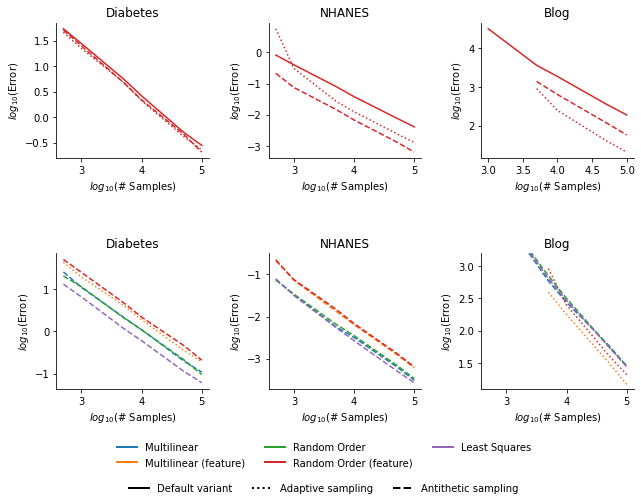

In [63]:
from shapley_algorithms.utils import plot_indices
from shapley_algorithms.utils import color_map, variant_map
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

num_evals_lst = [500, 1000, 5000, 10000, 50000, 100000]
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(9,7))
exp_names = ['diabetes', 'nhanes', 'blog']
ylabel = 'Error'

# Plot the random order (feature-wise) errors
indices = ['ROF', 'ROF_ANTI', 'ROF_ADAPT']

for i, exp_name in enumerate(exp_names):
    cache_path = f'cache/{exp_name}/'
    err_df = pd.read_csv(cache_path+'error.csv', index_col=0)
    if exp_name == 'nhanes':
        title = exp_name.upper()
    else:
        title = exp_name.capitalize()
    
    for index, row in err_df.iterrows():

        if index in indices:
            curr_method = index.split("_")[0]

            variant = 'NONE'
            if "_" in index: 
                variant = index.split("_")[1]
            
            ax = axs[0][i]
            ax.plot(
                np.log10(num_evals_lst), np.log10(row), variant_map[variant], 
                label=index, color=color_map[curr_method]
            )
            ax.set_xlabel("$log_{10}$(# Samples)")
            ax.set_ylabel("$log_{10}$" + f"({ylabel})")
            ax.set_title(title)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            
# Plot the best errors per variant
for i, exp_name in enumerate(exp_names):
        
    cache_path = f'cache/{exp_name}/'
    err_df = pd.read_csv(cache_path+'error.csv', index_col=0)
    
    prefixes = ['ME', 'MEF', 'ROF', 'RO', 'LS']
    best_inds = []
    for prefix in prefixes:
        valid_inds = []
        for ind in err_df.index:
            if ind.startswith(prefix+'_') or ind == prefix:
                valid_inds.append(ind)
        best_ind = err_df.loc[valid_inds]['100000'].argmin()
        best_inds.append(valid_inds[best_ind])

    if exp_name == 'nhanes':
        title = exp_name.upper()
    else:
        title = exp_name.capitalize()
    
    for index, row in err_df.iterrows():

        if index in best_inds:
            curr_method = index.split("_")[0]

            variant = 'NONE'
            if "_" in index: 
                variant = index.split("_")[1]
            
            ax = axs[1][i]
            ax.plot(
                np.log10(num_evals_lst), np.log10(row), variant_map[variant], 
                    label=index, color=color_map[curr_method]
            )
            ax.set_xlabel("$log_{10}$(# Samples)")
            ax.set_ylabel("$log_{10}$" + f"({ylabel})")
            ax.set_title(title)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            if exp_name == 'blog':
                axs[1][i].set_ylim([1.1, 3.2])

# Form the legends
fig.tight_layout()
fig.subplots_adjust(hspace=.7)
fig.subplots_adjust(bottom=.22)   ##  Need to play with this number.

def create_line(line_type='-', marker=None, color='black'):
    return Line2D(
        [0], [0], linestyle=line_type, color=color, marker=marker, lw=2
    )

method_dict = {
    'Multilinear': create_line(color='C0'),
    'Multilinear (feature)': create_line(color='C1'),
    'Random Order': create_line(color='C2'),
    'Random Order (feature)': create_line(color='C3'),
    'Least Squares': create_line(color='C4'),
}
fig.legend(handles = method_dict.values(), labels=method_dict.keys(),
           loc='lower center', ncol=3, bbox_to_anchor=(0.5, .05), 
           frameon=False)

variant_dict = {
    'Default variant': create_line(),
    'Adaptive sampling': create_line(':'),
    'Antithetic sampling': create_line('--'),
#     'Stochastic gradient descent': create_line('-', 's'),
#     'Random sampling': create_line('-.'),
}
fig.legend(handles = variant_dict.values(), labels=variant_dict.keys(),
           loc='lower center', ncol=3, bbox_to_anchor=(0.5, 0), frameon=False)

plt.savefig("benchmark.pdf")

plt.show()